## Harry Markowitz Modern Portfolio Theory

The code here is used to create portfolios on the efficient frontier based on modern portfolio theory.

In [1]:
# Importing the necessary Python modules required in this notebook 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from custom_functions import portfolio_creator

Enter portfolio stocks and create a dataframe of portfolio constituent price series using function portfolio_creator()

In [2]:
# Define list of stocks
ticker_list = ['amzn', 'fb', 'aapl', 'nflx', 'goog', 'msft']

# Read CSV to get the prices
stock_prices = portfolio_creator(ticker_list)

# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) \
                   + 1)**(252/len(stock_prices)) - 1)

Retrieving price data for amzn
Retrieving price data for fb
Retrieving price data for aapl
Retrieving price data for nflx
Retrieving price data for goog
Retrieving price data for msft


In [3]:
# confirm there is no nan values
stock_prices.isnull().sum()

amzn    0
fb      0
aapl    0
nflx    0
goog    0
msft    0
dtype: int64

Generate any number of portfolios using random weights for each constituent stock.

In [4]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 1000

# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Calculate annualised variance matrix of daily returns
cov_matrix = stock_returns.cov() * 252

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    #rnd_nums = np.random.random(num_of_stocks)
    rnd_nums = np.random.uniform(-1, 1, num_of_stocks)
    
    # Ensure the sum of weights is 1 - proportionally the rnd nums sum to 1
    weights = list(rnd_nums/sum(abs(rnd_nums)))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Convert weight allocation into vector
    weights_vector = np.zeros(shape=(num_of_stocks,1))
    
    for n, wt in enumerate(weights):
        weights_vector[n] = wt
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * annual_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = weights * stock_returns
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = math.sqrt(np.linalg.multi_dot([np.transpose(weights_vector), cov_matrix.values, weights_vector])[0])

    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

Identify the portfolios with maximum sharpe and minimum standard deviation and plot them on the efficient frontier.

In [5]:
# sanity check on portfolios created
portfolio.head()

,returns,std_dev,returns/std_dev
0,0.140347,0.087885,1.596932
1,0.182517,0.125722,1.451752
2,0.159827,0.129694,1.232342
3,-0.028230,0.084531,-0.333964
4,-0.122218,0.103328,-1.182812


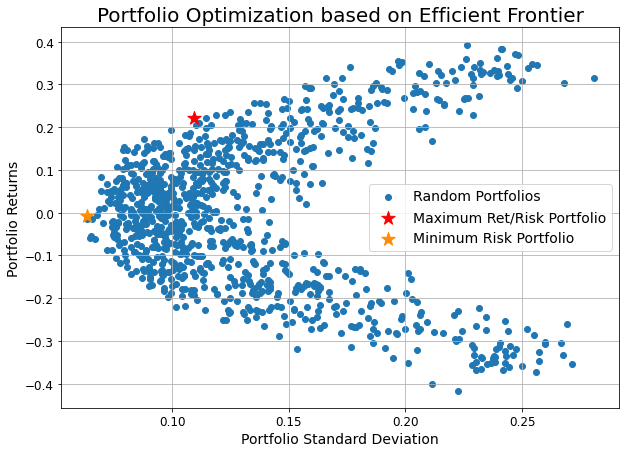

In [6]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

Portfolio optimization results.

In [7]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2)))

print('\n')

# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.220814
std_dev            0.109376
returns/std_dev    2.018863
Name: 376, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
amzn 1.71%
fb 20.33%
aapl -21.13%
nflx 7.83%
goog -28.03%
msft -20.98%


The portfolio metrics for the minimum std dev. portfolio:
returns           -0.006627
std_dev            0.063321
returns/std_dev   -0.104663
Name: 235, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
amzn -12.62%
fb 19.47%
aapl -7.81%
nflx -12.74%
goog -17.04%
msft 30.32%
